In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Importing the data
The data used is the New York City Airbnb Open Data from Kaggle which has Airbnb listings and metrics in NYC, NY, USA (2019).

In [2]:
df = pd.read_csv('AirbnbData.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Cleaning the data

In [3]:
df.shape

(48895, 16)

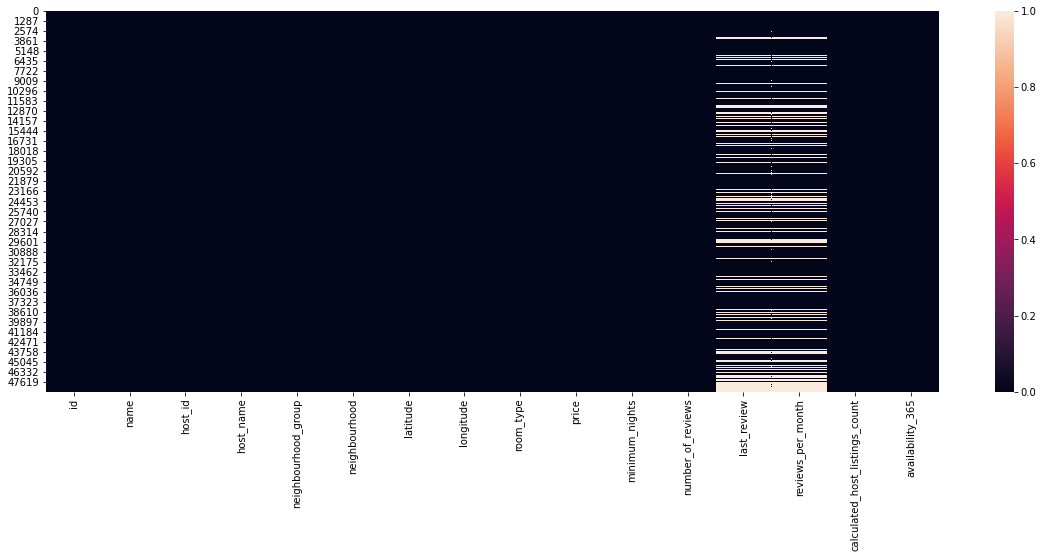

In [4]:
plt.figure(figsize = (20,7))
sns.heatmap(df.isna())

In [5]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Removing the columns which have high number of missing values or not required for our analysis. 

In [7]:
df.drop(['id', 'name', 'host_id', 'last_review', 'reviews_per_month'], axis = 1, inplace = True)

In [8]:
df

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


# Top hosts
The airbnbs which are not available easily will be having a high demand. Also the airbnbs with high number of reviews will be good because no one will keep booking them if the reviews are bad. The top hosts will have high number of reviews and low availability of their airbnbs. So creating a dataframe using the same logic by grouping the data by the name of the host and then sorting it simultaneously by reviews in descending order and by availability in ascending order.

In [9]:
data = {'Name': df['host_name'], 'Reviews': df['number_of_reviews'], 'Availability': df['availability_365']}
TopHost = pd.DataFrame(data)
TopHost = (TopHost.groupby('Name').sum())
TopHost = TopHost.sort_values(['Reviews', 'Availability'], ascending = [False, True]).head(10).reset_index()
TopHost

,Name,Reviews,Availability
0,Michael,11081,38888
1,David,8103,44171
2,John,7223,40249
3,Jason,6522,19338
4,Alex,6204,30031
5,Chris,5028,18056
6,Anna,4799,20580
7,Eric,4733,11284
8,Daniel,4723,17015
9,Sarah,4579,12183


[Text(0.5, 1.0, 'Top 10 hosts')]

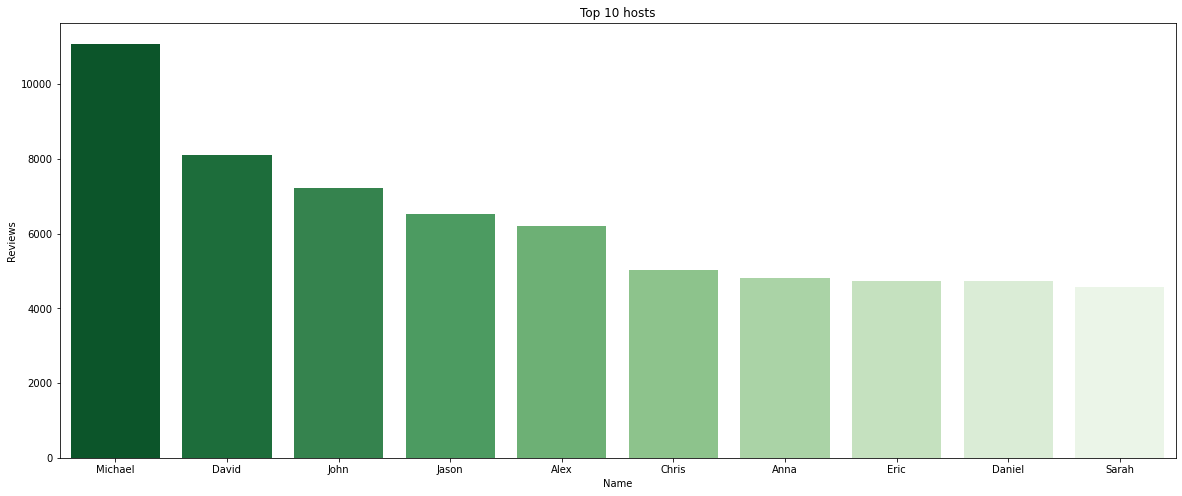

In [10]:
plt.figure(figsize = (20,8))
sns.barplot(data = TopHost, x = 'Name', y = 'Reviews', palette = 'Greens_r').set(title = 'Top 10 hosts')

# Popular and expensive neighbourhoods
Popular neighbourhoods will be the ones with high number of airbnbs. Expensive neighbourhoods will have highest average prices.

In [11]:
d = {'Neighbourhood': df['neighbourhood'], 'Airbnb': np.ones(len(df['neighbourhood']))}
PopularNeighbourhood = pd.DataFrame(d)
PopularNeighbourhood = PopularNeighbourhood.groupby('Neighbourhood').sum()
PopularNeighbourhood = PopularNeighbourhood.sort_values(['Airbnb'], ascending = False).head(10).reset_index()
PopularNeighbourhood

d1 = {'Neighbourhood': df['neighbourhood'], 'Price': df['price']}
ExpensiveNeighbourhood = pd.DataFrame(d1)
ExpensiveNeighbourhood = ExpensiveNeighbourhood.groupby('Neighbourhood').mean()
ExpensiveNeighbourhood = ExpensiveNeighbourhood.sort_values(['Price'], ascending = False).head(10).reset_index()
ExpensiveNeighbourhood

display(PopularNeighbourhood)
display(ExpensiveNeighbourhood)

,Neighbourhood,Airbnb
0,Williamsburg,3920.0
1,Bedford-Stuyvesant,3714.0
2,Harlem,2658.0
3,Bushwick,2465.0
4,Upper West Side,1971.0
5,Hell's Kitchen,1958.0
6,East Village,1853.0
7,Upper East Side,1798.0
8,Crown Heights,1564.0
9,Midtown,1545.0


,Neighbourhood,Price
0,Fort Wadsworth,800.000000
1,Woodrow,700.000000
2,Tribeca,490.638418
3,Sea Gate,487.857143
4,Riverdale,442.090909
5,Prince's Bay,409.500000
6,Battery Park City,367.557143
7,Flatiron District,341.925000
8,Randall Manor,336.000000
9,NoHo,295.717949


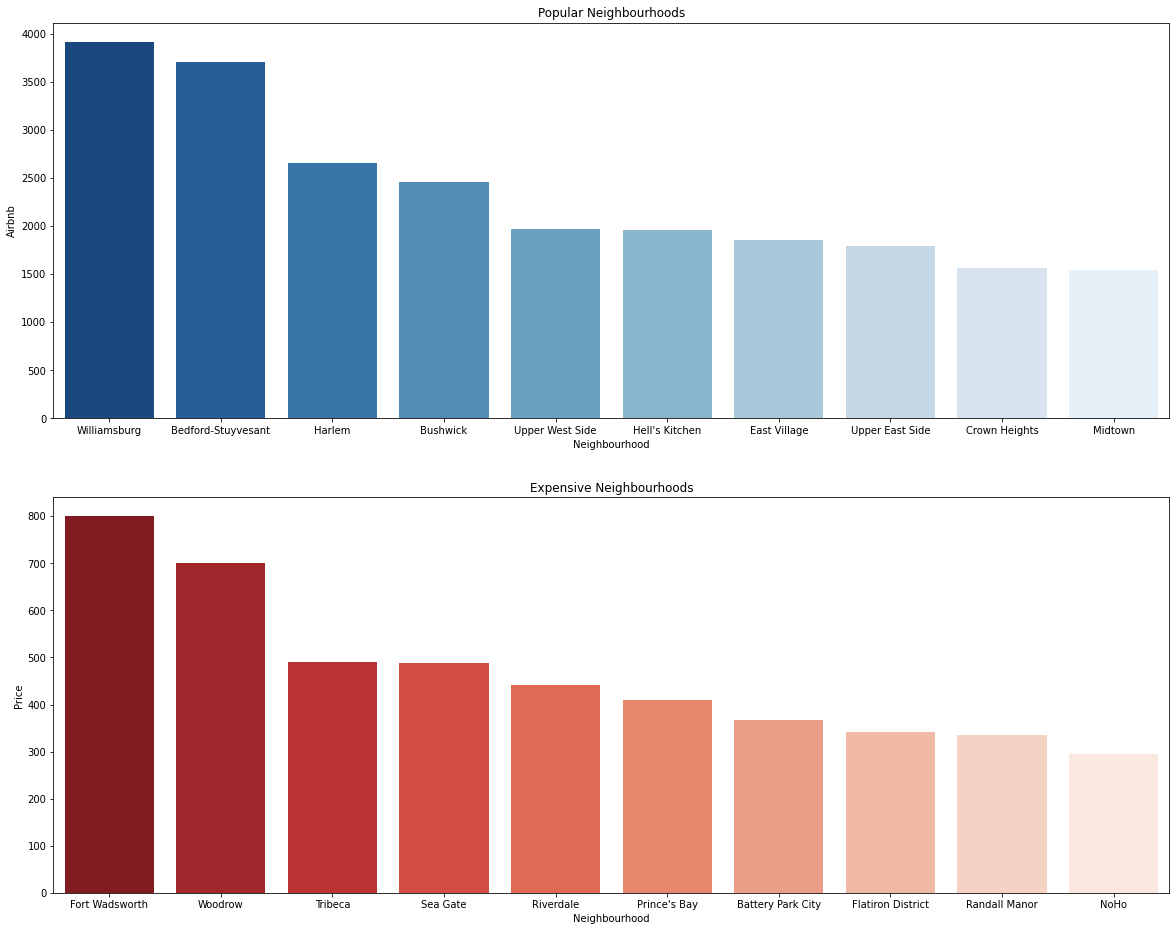

In [12]:
plt.figure(figsize=(20,16))

plt.subplot(211)
sns.barplot(data = PopularNeighbourhood, x = 'Neighbourhood', y = 'Airbnb', palette = 'Blues_r').set(title = 'Popular Neighbourhoods')

plt.subplot(212)
sns.barplot(data = ExpensiveNeighbourhood, x = 'Neighbourhood', y = 'Price', palette = 'Reds_r').set(title = 'Expensive Neighbourhoods')

plt.show()

# Pricing in different boroughs

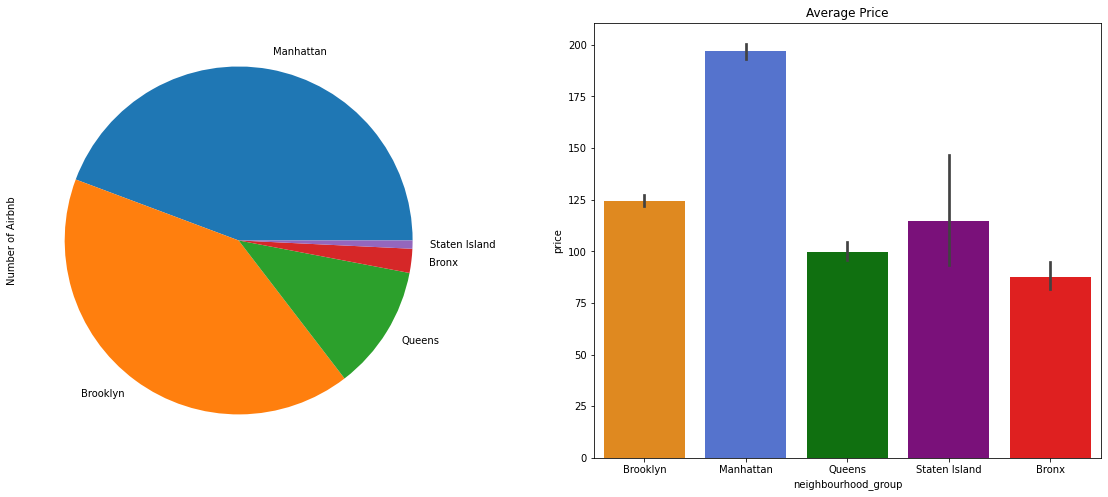

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(121)
df['neighbourhood_group'].value_counts().plot(kind='pie', label = 'Number of Airbnb')

plt.subplot(122)
sns.barplot(data = df, x = 'neighbourhood_group', y = 'price',palette=['darkorange', 'royalblue', 'green', 'darkmagenta', 'red']).set(title = 'Average Price')

plt.show()

In [ ]:
fig = px.scatter_mapbox(df, lat=df["latitude"], lon=df["longitude"], color=df["price"], size=df["price"],
                        color_continuous_scale=px.colors.sequential.Bluered, size_max=8, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<img src="Map 1.png" width="800" />

- Most number of airbnbs are located in Manhattan followed by Brooklyn.
- Staten Island has the widest range of pricing.
- The mapbox shows that most of the high priced airbnbs are located in areas where there are high number of airbnbs.

# Room type

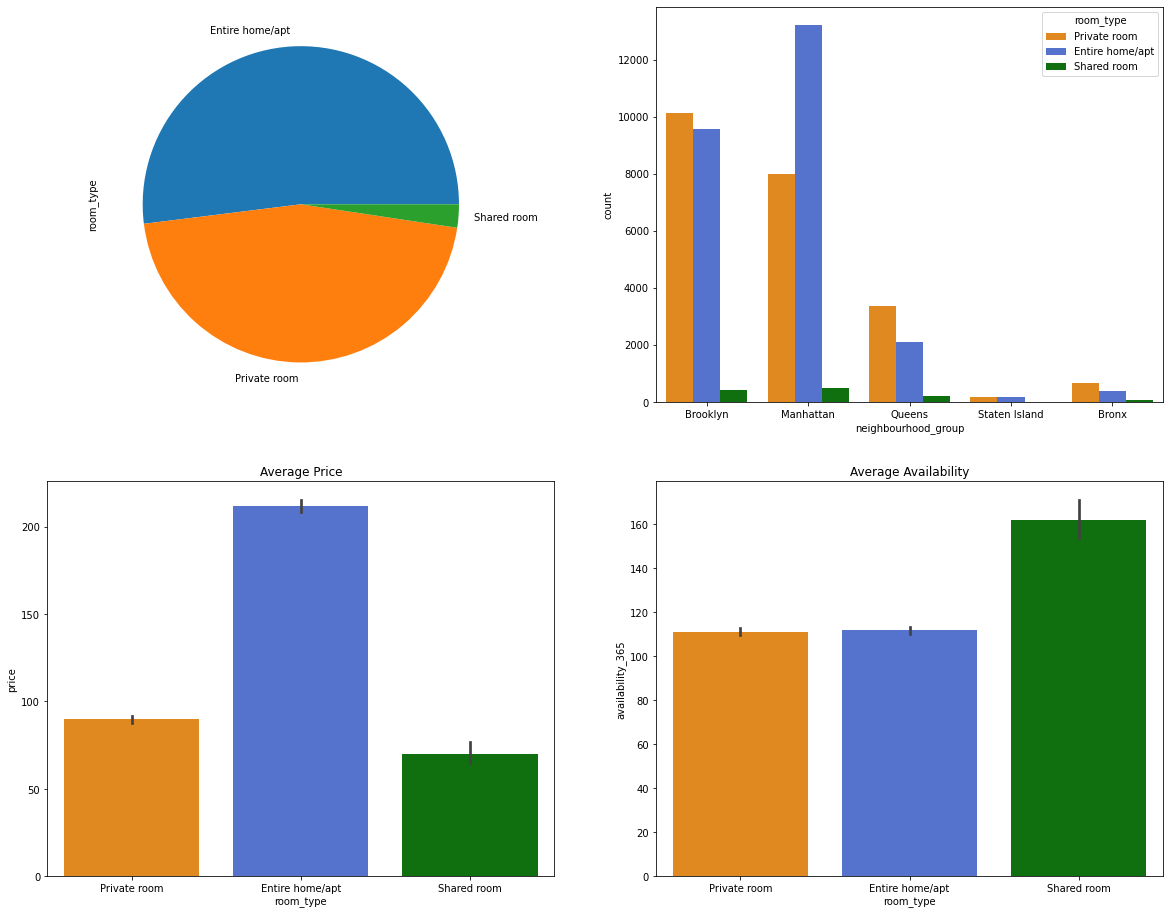

In [15]:
plt.figure(figsize=(20,16))

plt.subplot(221)
df['room_type'].value_counts().plot(kind= 'pie')

plt.subplot(222)
sns.countplot(data = df, x = 'neighbourhood_group', hue = 'room_type', palette = ['darkorange', 'royalblue', 'green'])

plt.subplot(223)
sns.barplot(data = df, x = 'room_type', y = 'price', palette = ['darkorange', 'royalblue', 'green']).set(title = 'Average Price')

plt.subplot(224)
sns.barplot(data = df, x = 'room_type', y = 'availability_365', palette = ['darkorange', 'royalblue', 'green']).set(title = 'Average Availability')

plt.show()

- The demand for shared room is very low as it has the highest average availability though there are very few shared rooms compared to private room and entire home. The possible reason for this can be that the average price of the private room is not very high compared to average price of shared room.
- As the average price of entire home is the maximum, it has a direct impact on average price of the boroughs. It can be inferred that the average price of borough is correlated to the number of entire homes.
- Staten Island has no shared rooms due to which it has the highest average price

# Availability

In [ ]:
fig = px.scatter_mapbox(df, lat=df["latitude"], lon=df["longitude"], color=df["availability_365"], size=df["availability_365"],
                        color_continuous_scale=px.colors.sequential.Blues, size_max=3, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<img src="Map 2.png" width="800" />

- The availability is positively correlated to the number of airbnbs in the boroughs.